In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [20]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)

service['bad'] = fuzz.trapmf(service.universe, [0, 0, 3, 5])
service['average'] = fuzz.trimf(service.universe, [0, 4, 10])
service['good'] = fuzz.trimf(service.universe, [3, 10, 10])
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
quality['bad'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['decent'] = fuzz.trimf(quality.universe, [0, 4, 10])
quality['good'] = fuzz.trimf(quality.universe, [3, 10, 10])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

In [12]:
#quality = np.arange(0, 11, 1)

C:\Users\Dell\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


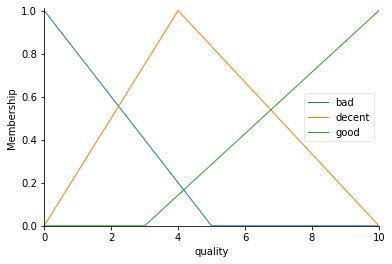

In [15]:
#To help understand what the membership looks like, use the ``view`` methods.
quality.view()

C:\Users\Dell\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


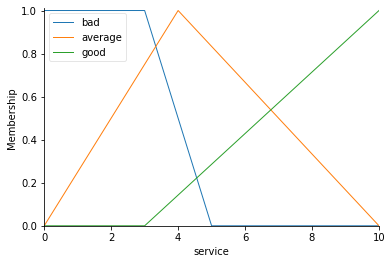

In [21]:
service.view()

C:\Users\Dell\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


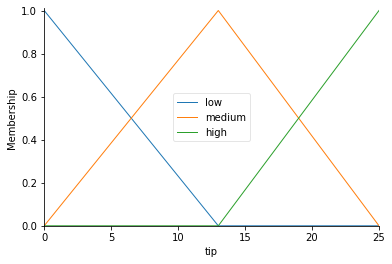

In [6]:
tip.view()

In [ ]:
'''Fuzzy rules
-----------

Now, to make these triangles useful, we define the *fuzzy relationship*
between input and output variables. For the purposes of our example, consider
three simple rules:

1. If the food is bad OR the service is poor, then the tip will be low
2. If the service is average, then the tip will be medium
3. If the food is good OR the service is good, then the tip will be high.

Most people would agree on these rules, but the rules are fuzzy. Mapping the
imprecise rules into a defined, actionable tip is a challenge. This is the
kind of task at which fuzzy logic excels.

'''

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1819ba19dc0>)

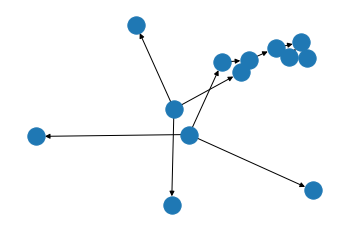

In [16]:
rule1 = ctrl.Rule(quality['bad'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule3.view()

In [ ]:
'''Control System Creation and Simulation
---------------------------------------

Now that we have our rules defined, we can simply create a control system
via:
'''

In [17]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])


In [ ]:
'''In order to simulate this control system, we will create a ControlSystemSimulation. 
Think of this object representing our controller applied to a specific set of cirucmstances. 
For tipping, this might be tipping Sharon at the local brew-pub. 
We would create another ControlSystemSimulation when we’re trying to apply our tipping_ctrl for 
Travis at the cafe because the inputs would be different.'''

In [18]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)


In [ ]:
'''We can now simulate our control system by simply specifying the inputs
and calling the ``compute`` method.  Suppose we rated the quality 6.5 out of 10
and the service 9.8 of 10.
'''

In [19]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 0
tipping.input['service'] = 0

# Crunch the numbers
tipping.compute()

4.333333333333333


C:\Users\Dell\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


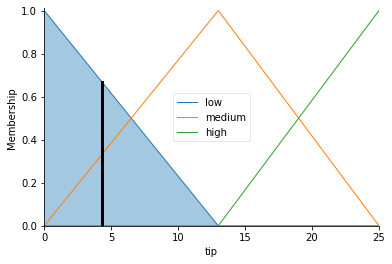

In [8]:
print(tipping.output['tip'])
tip.view(sim=tipping)